z=0.3
z=0.39
z=0.4521
z=0.50439441
z=0.5544137208392481
z=0.6073745738548197
z=0.6689038729653238
z=0.7474323912680101
z=0.8586551795166157
z=1.0372887173107115
z=1.3759678830601012
z=2.1932876152128964
z=5.110510563046274
z=26.417318215007548
z=698.1747016729695
z=487448.2140561399
z=237605761386.8204
z=5.6456497844210635e+22
z=3.18733614883336e+45
z=1.0159111725659876e+91


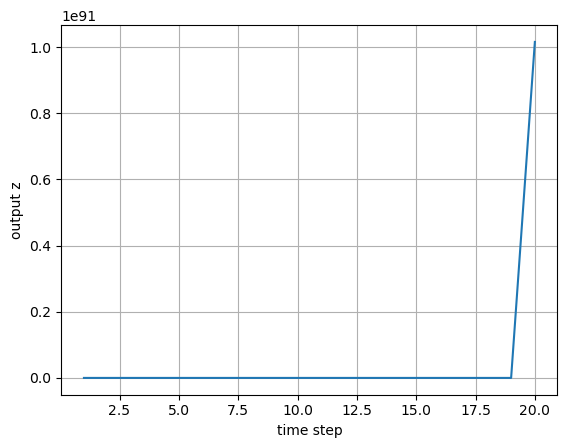

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def fx(z, c):
    return (z ** 2) + c


seed = 0
c = 0.3
z = seed

iterations = 20


x = np.linspace(1, iterations, iterations, dtype=int)
y = np.zeros(iterations)
for i in range(iterations):
    output = fx(z,c)
    z = output
    print(f'{z=}')
    y[i] = z

plt.xlabel('time step')
plt.ylabel('output z')
plt.grid()
plt.plot(x,y)
plt.show()

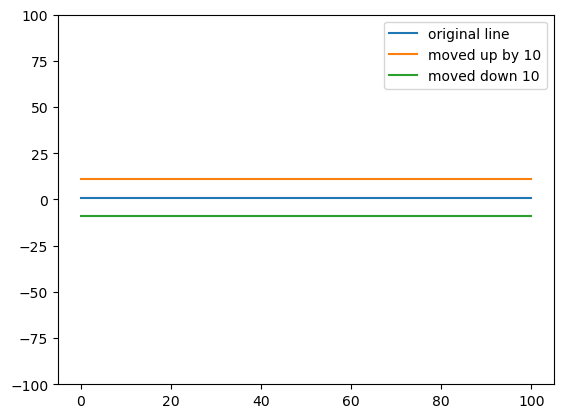

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Basic iteration (output -> input) and simple transformation

def line(x):
    return x**0

def move_up(x, displacement):
    return x + displacement

def move_down(x, displacement):
    return x - displacement

x = np.linspace(0,100,100)

first_line = line(x)
plt.plot(x, first_line, label='original line')

displacement = 10
moved_up = move_up(first_line, displacement)
moved_down = move_down(first_line, displacement)

plt.plot(x, moved_up, label=f'moved up by {displacement}')
plt.plot(x, moved_down, label=f'moved down {displacement}')

plt.ylim(-100,100)

plt.legend()
plt.show()

In [3]:
# affine transformation (piecewise linear transformation)

# simple coordinate manipulation

def bend(coords, bend_point, slope = 1):
    transformed = coords.copy()
    x,y = transformed
    
    x[bend_point:] = x[bend_point]
    y[bend_point:] = y[bend_point] + np.arange(0, bend_point)
    
    return transformed

xx = np.arange(0,100)
yy = np.zeros(100)
xy = np.stack((xx,yy)) # [ [..x..], [..y..] ]

def make_line(coords,y):
    transformed = coords.copy()
    transformed[1, :] = y # t[1,:] means get the 2nd list and all elements in that list
    return transformed

def move_line_up(coords,displacement):
    transformed = coords.copy()
    y = transformed[1]
    transformed[1] = y + displacement
    return transformed

def move_line_down(coords,displacement):
    transformed = coords.copy()
    y = transformed[1]
    transformed[1] = y - displacement
    return transformed

line = make_line(xy,1)
moved_up = move_line_up(line,10)
moved_down = move_line_down(line,10)
bent = bend(line, 60)

plt.plot(line[0], line[1], label='origin line')
plt.plot(moved_up[0],moved_up[1], label='moved up')
plt.plot(moved_down[0],moved_down[1], label='moved down')
plt.plot(bent[0],bent[1], label='bent')

plt.ylim(-100,100)
plt.legend()
plt.show()

# as a piecewise function

# TODO:  affine transformations: rotation, translation, scaling, reflection/reversal

ValueError: could not broadcast input array from shape (60,) into shape (40,)

In [ ]:
xx = np.linspace(0,100,100)
yy = np.zeros(100)

cs = np.column_stack((xx,yy)) # [ [x,y],[x,y],[x,y],... ]

s = np.stack((xx,yy)) # [[...x...],[...y...]]

# print(cs.shape) # (100,2) - rows (how many lists in the outer list) x cols (ith elements in a list)
# print(cs)
# print(s.shape) # (2,100)
# print(s)

print('\n')
# print(s.T) # transposed - [ [x,y],[x,y], ... ] same as column_stack
# t=s.T
# print(t.T) # transposed again - [ [..x..], [..y..] ] back to original form of np.stack()

s[0,3] = 44
print(s[0])